<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 20px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">🔥 BiLSTM RNN Excellence: Achieving 94% Accuracy in Emotion Analysis!</h1>
</div>


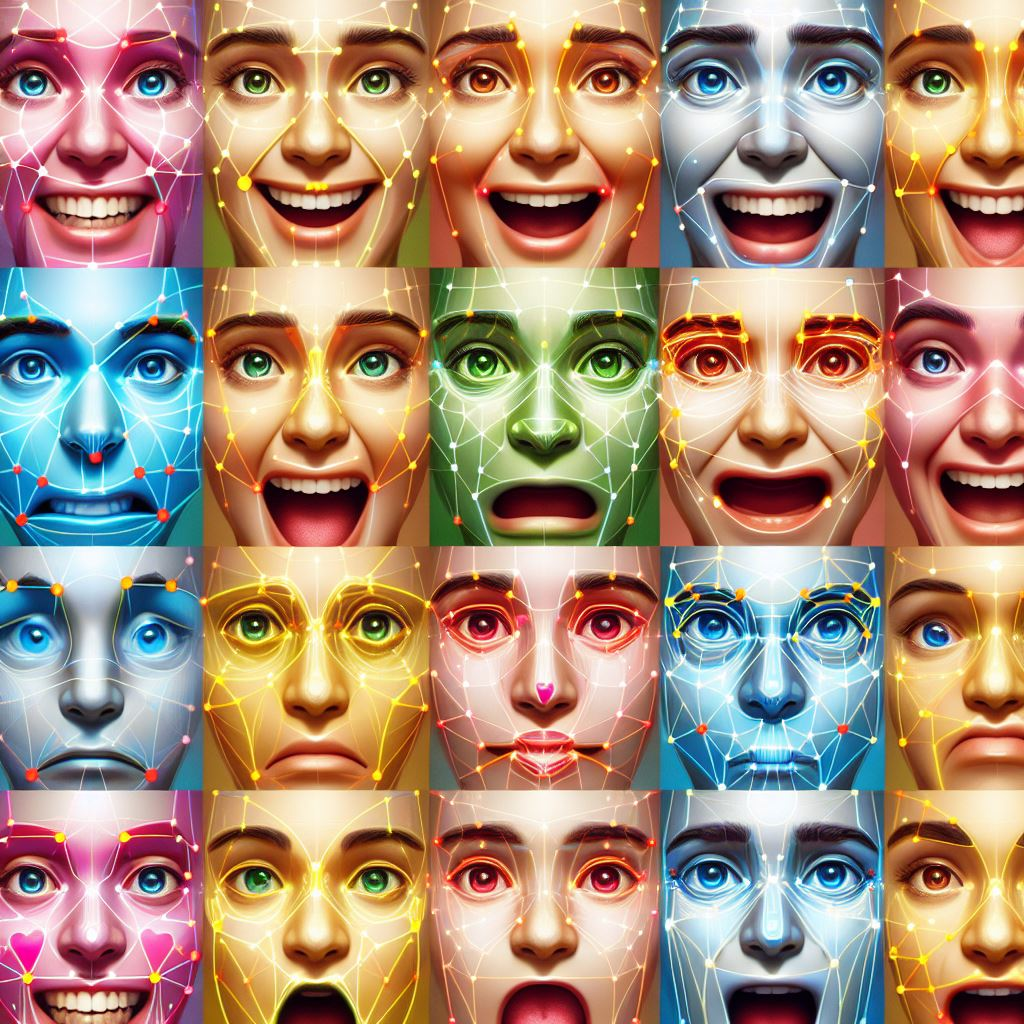

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">ABOUT THE AUTHER</h1>
</div>

Hi there! I'm Saman Fatima, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together 

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."

| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                        |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Saman Fatima**      |samanfatimak7@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/saman-fatima-datascience/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/muhammadabdullah0303)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/samanfatima7)  |

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">ABOUT THE DATASET</h1>
</div>


**INTRODUCTION**
- Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

**DATASET**

- Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

**KEY FEATURES**

- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.



<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">LOADING THE LIBRARIES</h1>
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">LOADING DATASET</h1>
</div>

In [4]:
df = pd.read_csv('/kaggle/input/emotions/text.csv')

In [5]:
df.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [9]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
# We have droped the extra column 
df.drop(columns='Unnamed: 0', inplace=True)


In [11]:
# checking the shape
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 2)


In [12]:
# checking the duplicates we have found some so we are going to remove them 
df.duplicated().sum()


686

In [58]:
# removing the duplicates
df = df.drop_duplicates()


In [14]:
# rechecking the duplicates
df.duplicated().sum()

0

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">DATA CLEANING</h1>
</div>

In [6]:
# we need to map the data so we can get the good visualization
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
    # Add more mappings as needed
}

df['label'] = df['label'].map(emotion_map)


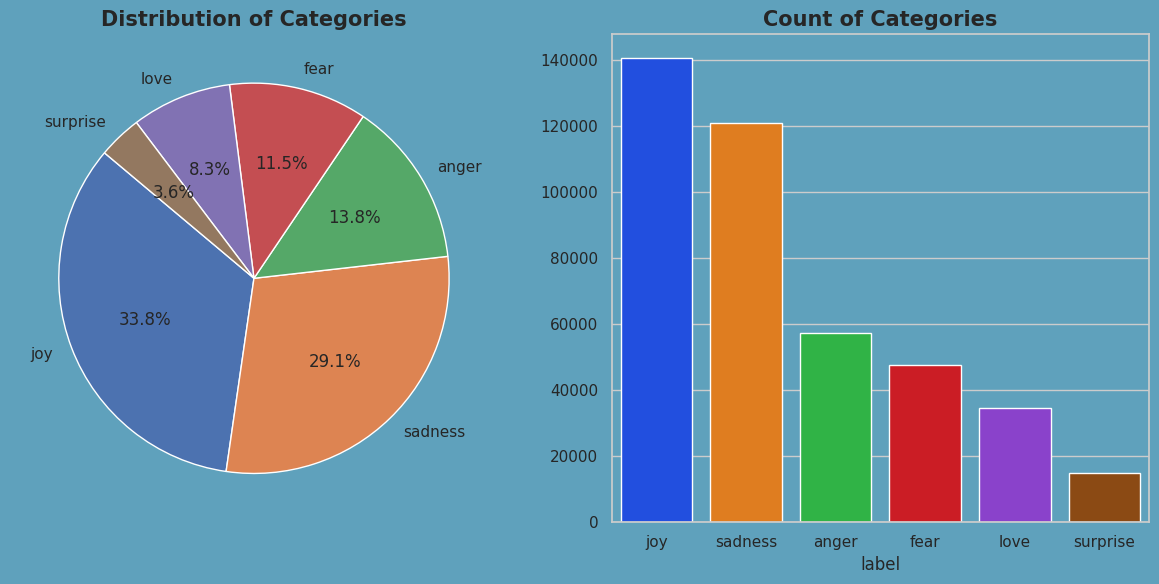

In [15]:
# Value count of 'label'
count = df['label'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">DATA CLEANING</h1>
</div>

**Textual Data Cleaning is Important Because:**

1. **Improving Accuracy**: Clean data leads to more accurate analysis and modeling results. Removing irrelevant or incorrect information ensures that the analysis is based on reliable data.

2. **Enhancing Readability**: Cleaned text is easier to read and understand. This is important for communication, especially in business reports, articles, and other forms of written content.

3. **Removing Noise**: Text data often contains noise in the form of special characters, punctuation, and other unnecessary elements. Cleaning helps remove this noise, focusing on the relevant content.

4. **Standardization**: Cleaning involves standardizing text by converting it to a consistent format. This helps in matching and comparing text data accurately.

5. **Preventing Biases**: Text cleaning can help reduce biases in data analysis. For example, removing gender-specific pronouns can help prevent gender bias in sentiment analysis.

6. **Improving Efficiency**: Cleaned data leads to more efficient processing and analysis. Algorithms can work more effectively on clean, structured data.

7. **Data Integration**: Clean data is easier to integrate with other datasets, enabling comprehensive analysis and insights.


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">1 | CHAT WORDS</h2>
</div>


**What are the Chat Words?**
- **Chat words** are informal expressions used in online communication, like "lol" and "brb."
- They need to be **handled in text processing** to normalize and understand them.
- Handling chat words is crucial for **accurate analysis**, especially in sentiment analysis and chatbot development.
- **Preprocessing chat words** improves user experience and ensures correct interpretation in conversational interfaces.


In [16]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

**THE MAGIC BEHIND THE CODE**

**Function Definition:**

- The code defines a function `replace_chat_words` that takes a text input and replaces chat words with their full forms.

**Working of the Function**

- It splits the input text into words and iterates through each word.
- If a word is found in a dictionary `chat_words` (mapping chat abbreviations to their full forms), it replaces the word with its full form.

**Applying the Function**

- The function is applied to the 'text' column of a DataFrame `df` using the `apply` method.
- This means that for each row in the 'text' column, the function is called to replace any chat words with their full forms.

**Final Result**

- The modified text, with chat words replaced, is stored back in the 'text' column of the DataFrame.


In [17]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['text'] = df['text'].apply(replace_chat_words)

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">2 | NON ALPHA NUMERIC CHARACTERS</h2>
</div>


- **Alpha non-numeric values** are characters in text data that are not numbers (e.g., letters, symbols).
- **Importance of Removing Them:**
  1. **Data Consistency**: Removing alpha non-numeric values ensures that the data is consistent and follows a standardized format.
  2. **Analysis Accuracy**: Eliminating these values improves the accuracy of text analysis by focusing on meaningful content.
  3. **Model Performance**: Models trained on clean data perform better and are less likely to be affected by noise.
  4. **Enhanced Readability**: Cleaned text is easier to read and understand, which is important for effective communication.


In [19]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

df.head()

,text,label
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color:#5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">3 | STOP WORDS</h2>
</div>


- **Stop words** are common words such as "the," "is," "and," etc., that are often filtered out from text data.
- **Importance of Removing Them:**
  1. **Improved Analysis**: Removing stop words reduces noise and focuses analysis on important words, improving the quality of results.
  2. **Reduced Dimensionality**: By removing stop words, the dimensionality of the data is reduced, leading to more efficient processing.
  3. **Enhanced Model Performance**: Stop words can interfere with certain natural language processing tasks, such as sentiment analysis or topic modeling. Removing them can improve model performance.
  4. **Better Interpretation**: Removing stop words can lead to clearer and more interpretable text, making it easier to extract meaningful insights.


In [20]:
stop = stopwords.words('english')
df["text"] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">4 | Lowercasing</h2>
</div>


- **Lowercasing** refers to converting all letters in a piece of text to lowercase.
- **Importance of Lowercasing:**
  1. **Standardization**: Lowercasing ensures uniformity in text, reducing variations for the same word.
  2. **Normalization**: It helps in treating words with different cases as the same word, improving analysis accuracy.
  3. **Consistency**: Lowercasing makes text easier to process and compare by removing case sensitivity.
  4. **Matching**: Lowercasing enables accurate matching of words, which is important for tasks like search and retrieval.


In [21]:
df['text'] = df['text'].str.lower()
print(df.head())

                                                text    label
0                 feel really helpless heavy hearted     fear
1  ive enjoyed able slouch relax unwind frankly n...  sadness
2            gave internship dmrg feeling distraught     fear
3                                dont know feel lost  sadness
4  kindergarten teacher thoroughly weary job take...     fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">5 | REMOVING NUMERIC</h2>
</div>

- **Removing numbers** involves eliminating numerical digits from text data.
- **Importance of Removing Them:**
  1. **Data Consistency**: Removing numbers helps maintain consistency in text format, especially when analyzing text for patterns or sentiment.
  2. **Focus on Meaningful Text**: By removing numbers, the analysis can focus more on the actual textual content, leading to more accurate insights.
  3. **Improved Model Performance**: Models trained on text without numbers may perform better as they are less likely to be distracted by numerical values.
  4. **Enhanced Readability**: Text without numbers is generally easier to read and understand, which is important for conveying information clearly.


In [22]:
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
df.head()

,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">6 | REMOVING WHITE SPACE</h2>
</div>

- **Removing white spaces** involves eliminating extra spaces, tabs, and newline characters from text data.
- **Importance of Removing Them:**
  1. **Data Consistency**: Removing white spaces ensures that text data is consistent and uniform, improving readability and analysis.
  2. **Improved Tokenization**: Clean text with no extra white spaces is easier to tokenize, a crucial step in natural language processing.
  3. **Enhanced Processing Efficiency**: Removing unnecessary white spaces reduces the size of the data, making processing more efficient.
  4. **Prevention of Errors**: Extra white spaces can lead to errors in text analysis and modeling, so removing them helps prevent such issues.


In [23]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
print(df.head())

                                                text    label
0                 feel really helpless heavy hearted     fear
1  ive enjoyed able slouch relax unwind frankly n...  sadness
2            gave internship dmrg feeling distraught     fear
3                                dont know feel lost  sadness
4  kindergarten teacher thoroughly weary job take...     fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">7 | REMOVING SPECIAL CHARACTER</h2>
</div>

- **Special characters** are non-alphanumeric characters such as punctuation marks, symbols, and whitespace.
- **Importance of Removing Them:**
  1. **Data Consistency**: Removing special characters helps standardize the text data, making it consistent and easier to work with.
  2. **Noise Reduction**: Special characters can introduce noise in the data, which can affect the accuracy of text analysis and machine learning models.
  3. **Improved Readability**: Cleaned text is easier to read and understand, which is important for effective communication and analysis.
  4. **Tokenization**: Removing special characters is often a preprocessing step for tokenization, which is essential for various text processing tasks.


In [24]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
print(df.head())

                                                text    label
0                 feel really helpless heavy hearted     fear
1  ive enjoyed able slouch relax unwind frankly n...  sadness
2            gave internship dmrg feeling distraught     fear
3                                dont know feel lost  sadness
4  kindergarten teacher thoroughly weary job take...     fear


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">8 | REMOVING URLS</h2>
</div>

- **Removing URLs** involves eliminating web addresses from text data.
- **Importance of Removing Them:**
  1. **Data Clarity**: Removing URLs improves the clarity of text by focusing on the actual content.
  2. **Analysis Relevance**: Eliminating URLs ensures that analysis is based on relevant text, not web links.
  3. **Model Efficiency**: Models trained on text without URLs perform better and are less likely to be confused by web addresses.
  4. **Enhanced Readability**: Cleaned text is easier to read and understand, improving overall user experience.


In [25]:
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
print(df.head())

                                                text    label
0                 feel really helpless heavy hearted     fear
1  ive enjoyed able slouch relax unwind frankly n...  sadness
2            gave internship dmrg feeling distraught     fear
3                                dont know feel lost  sadness
4  kindergarten teacher thoroughly weary job take...     fear


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">DATA VISUALIZATION</h1>
</div>

**Why Data Visualization Is Important?**

1. **Insight Generation**: Visualizations can reveal patterns, trends, and relationships in text data that may not be apparent from raw text alone. This can lead to new insights and a deeper understanding of the data.

2. **Communication**: Visualizations make it easier to communicate complex information contained in textual data to a non-technical audience. They can help convey key findings and messages more effectively.

3. **Exploratory Data Analysis (EDA)**: Visualizations are essential for EDA, allowing analysts to quickly explore and understand the structure and content of textual data before diving into more detailed analysis.

4. **Identifying Anomalies**: Visualizations can help identify anomalies or outliers in text data, such as unusually frequent or rare words, which may require further investigation.

5. **Comparative Analysis**: Visualizations enable comparison between different sets of textual data, such as comparing the frequency of words in different documents or categories.

6. **Enhancing Reports and Presentations**: Visualizations can enhance the visual appeal of reports and presentations, making them more engaging and easier to understand.


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Sadness'</h2>
</div>

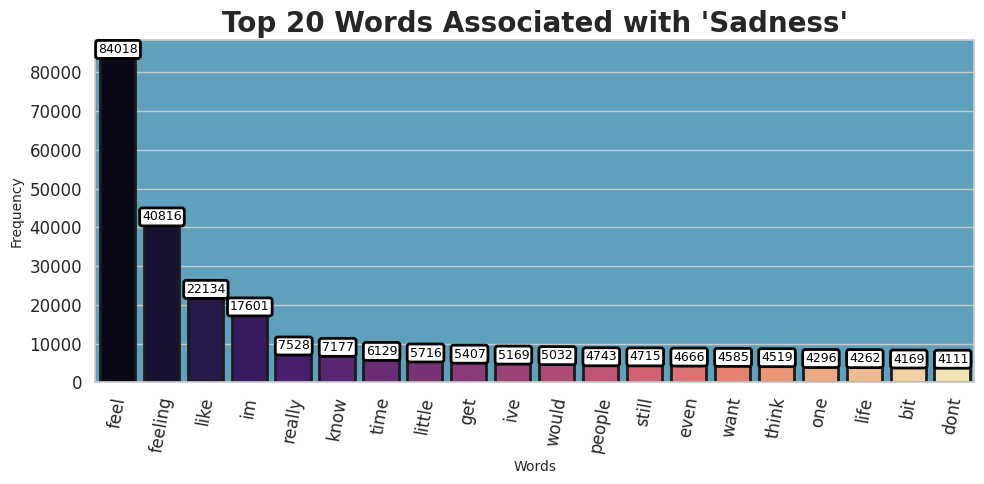

In [26]:
love_texts = df[df['label'] == 'sadness']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Sadness'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Love'</h2>
</div>

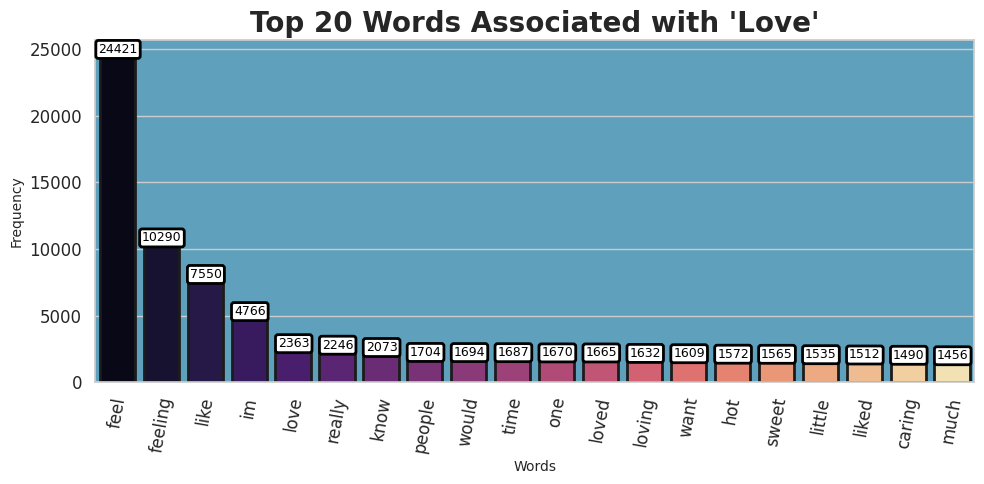

In [27]:
love_texts = df[df['label'] == 'love']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Love'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Joy'</h2>
</div>

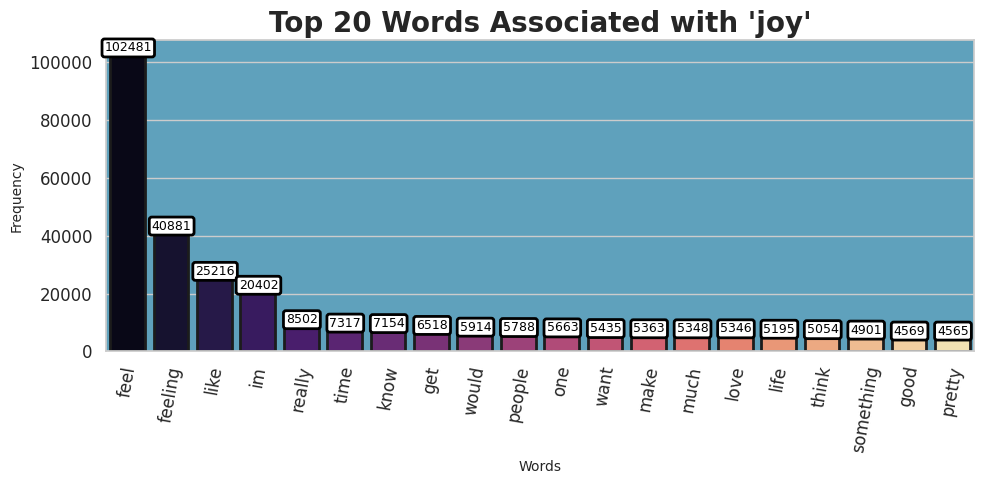

In [28]:
love_texts = df[df['label'] == 'joy']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'joy'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Anger'</h2>
</div>

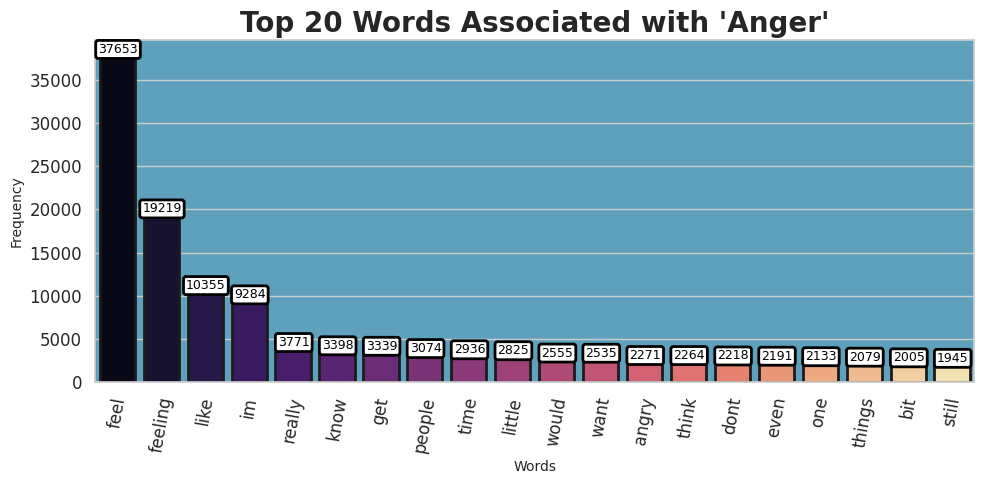

In [29]:
love_texts = df[df['label'] == 'anger']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Anger'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Fear'</h2>
</div>

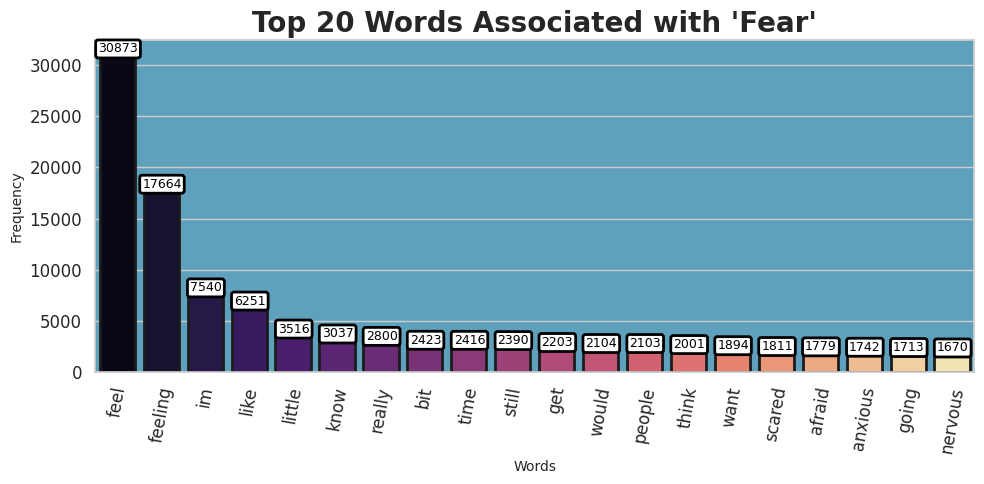

In [30]:
love_texts = df[df['label'] == 'fear']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Fear'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">Top 20 Words Associated with 'Surprise'</h2>
</div>

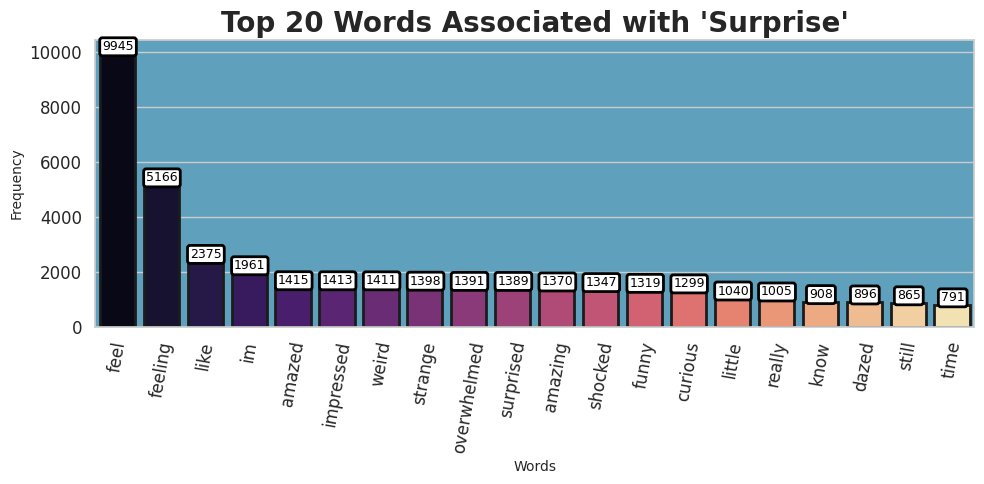

In [31]:
love_texts = df[df['label'] == 'surprise']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in love_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and themesss
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Surprise'", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">A Glimpse into the Cleaned Data 🕵️‍♂️📊</h1>
</div>

- A sneak peek of the data after cleaning reveals interesting patterns and trends.
- The cleaned data appears more organized and structured, making it easier to analyze.
- It also seems to have fewer errors and inconsistencies, which is crucial for accurate analysis and modeling.
- Overall, the cleaned data looks promising and ready for further exploration.


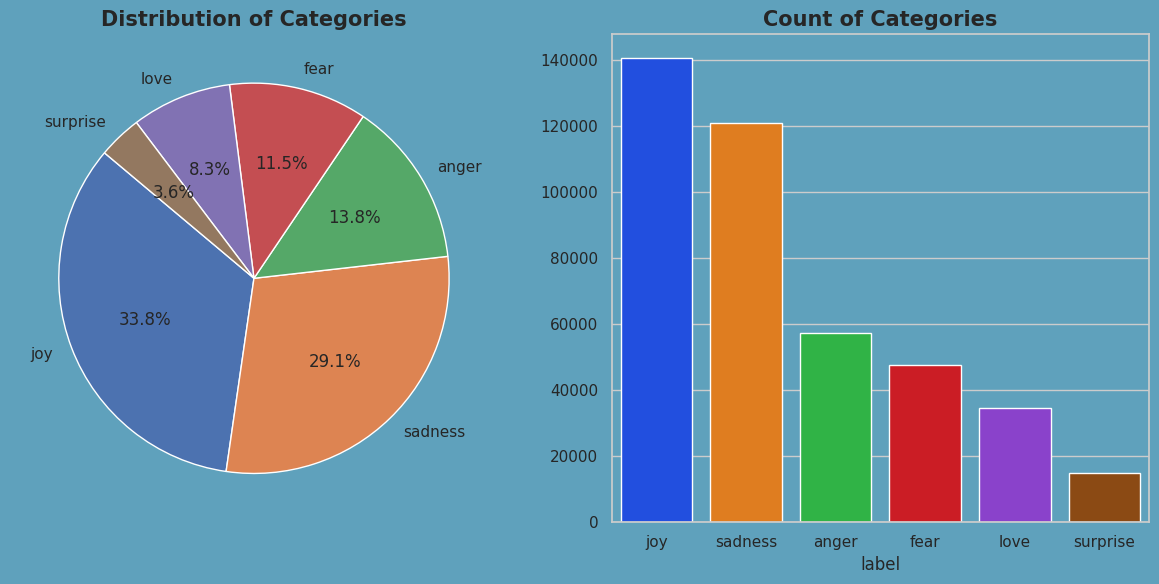

In [32]:
# Value count of 'label'
count = df['label'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #ffea00; padding: 10px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 5px; font-size: 24px;">🌀 Unleashing the Power of BiLSTM in Deep Learning!</h1>
</div>

In [33]:
df.head()

,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


**We just remap the df ['label']**

In [34]:
# Define a mapping dictionary
label_mapping = {'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4,'surprise':5}

# Rename the 'Label' column using the mapping dictionary
df['label'] = df['label'].map(label_mapping)


In [35]:
#  now you can see that the fear sadness etc convert into numbers which will make our 
# task easy in terms of computation and speed  
df.head()

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">📚 Text Splitting Adventure: Training the Data!</h2>
</div>

In [36]:
# splitting the data 
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is  (332898,)
The shape of X_test is  (83225,)
The shape of y_train is (332898,)
The shape of y_test is (83225,)


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">🔠 Tokenization Trek: Breaking Down the Text!</h2>
</div>

## Introduction to Tokenizer and Sequences

- **Tokenizer**:
    - Tokenizer is a tool used in natural language processing (NLP) to convert text into tokens, which are smaller units like words or subwords.
    - It helps in preprocessing textual data for tasks like text classification, sentiment analysis, and machine translation.

- **Why Use Tokenizer**:
    - Tokenization is crucial because it breaks down text into manageable pieces for analysis.
    - It standardizes text by converting it into a format that can be easily processed by machine learning algorithms.

- **Sequence**:
    - In NLP, a sequence refers to an ordered list of tokens representing a piece of text or a sentence.
    - Sequences are fundamental in NLP tasks as they preserve the order of words, which is essential for understanding the meaning of the text.

- **Importance of Sequences**:
    - Sequences help in capturing the context and relationships between words in a sentence.
    - They enable models to learn from the sequential nature of language, improving performance in tasks like language modeling and text generation.


In [38]:
tokenizer = Tokenizer(num_words=60000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [39]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [41]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">🧩 Padding Puzzle: Completing the Text Blocks!</h2>
</div>

In [43]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [44]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[2513   13 2430 ...    0    0    0]
 [   1  845  392 ...    0    0    0]
 [   1  659   83 ...    0    0    0]
 ...
 [1453   24    1 ...    0    0    0]
 [   6   13  262 ...    0    0    0]
 [ 171  102    2 ...    0    0    0]]

X_test_padded:
[[   6  213  146 ...    0    0    0]
 [   2  223   32 ...    0    0    0]
 [ 189   11    1 ...    0    0    0]
 ...
 [   1  563 1097 ...    0    0    0]
 [   4  303 8707 ...    0    0    0]
 [   1    3  105 ...    0    0    0]]


In [47]:
# Embedding Input Size
input_size = np.max(X_train_padded) + 1
input_size

60000

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
🚧 Sharing Errors and Solutions: Enhancing Understanding for Readers and Beginners 🛠️</h2>
</div>

- **I have decided to include an error section in every notebook, documenting the challenges encountered during the project and their respective solutions. This approach aims to provide readers and beginners with a better understanding of the process.**


Error Message = ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 10} 

Error Solution Link = https://colab.research.google.com/gist/SuryanarayanaY/f9c7b558969391b5cdcbd8019bacb181/19094_embedding_layer.ipynb#scrollTo=aZNPNPphEbI8 


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
🛠️ Building a Bidirectional LSTM Model</h2>
</div>

## 1. Define the Model
`model = Sequential()` initializes a sequential model, where layers are added sequentially.

## 2. Add an Embedding Layer
`model.add(Embedding(input_dim=input_size, output_dim=100, input_length=75))` adds an embedding layer. This layer is often used in NLP tasks to convert input text into dense vectors of fixed size. `input_dim` specifies the size of the vocabulary (e.g., 1000), `output_dim` is the dimension of the dense embedding, and `input_length` is the length of input sequences (e.g., 75).

## 3. Add a Bidirectional GRU Layer
`model.add(Bidirectional(LSTM(128)))` adds a bidirectional GRU (Gated Recurrent Unit) layer with 128 units. Bidirectional layers process the input sequence in both directions (forward and backward), which can capture more context in the sequence.

## 4. Add Batch Normalization Layer
`model.add(BatchNormalization())` adds a batch normalization layer. Batch normalization normalizes the activations of the previous layer, which can help with training speed and stability.

## 5. Add Dropout Regularization
`model.add(Dropout(0.5))` adds a dropout layer with a dropout rate of 0.5. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training, which helps prevent overfitting.

## 6. Add a Dense Layer with ReLU Activation
`model.add(Dense(64, activation='relu'))` adds a dense layer with 64 units and ReLU activation function. This layer introduces non-linearity into the model.

## 7. Add Another Dropout Layer
`model.add(Dropout(0.5))` adds another dropout layer with a dropout rate of 0.5 for further regularization.

## 8. Add the Output Layer
`model.add(Dense(6, activation='softmax'))` adds the output layer with 6 units (assuming a classification task with 6 classes) and softmax activation function. Softmax converts the output into probabilities, where each unit represents the probability of a particular class.


In [48]:
# Define the model
model = Sequential()

# Add an embedding layer 
model.add(Embedding(input_dim=input_size, output_dim=100,input_shape=(79,)))

# Add a bidirectional GRU layer with 128 units
model.add(Bidirectional(LSTM(128)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add dropout regularization
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 6 units for 6 labels and softmax activation
model.add(Dense(6, activation='softmax'))

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
🛠️ Compiling The Model</h2>
</div>

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 79, 100)        │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,252,358 (23.85 MB)

 Trainable params: 6,251,846 (23.85 MB)

 Non-trainable params: 512 (2.00 KB)

<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
🚀 Training the Bidirectional LSTM Model</h2>
</div>

In [50]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=32, validation_data=(X_test_padded, y_test),callbacks=[EarlyStopping(patience=3)])

Epoch 1/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 139s 13ms/step - accuracy: 0.8423 - loss: 0.4203 - val_accuracy: 0.9365 - val_loss: 0.0998
Epoch 2/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 133s 13ms/step - accuracy: 0.9372 - loss: 0.1102 - val_accuracy: 0.9398 - val_loss: 0.0948
Epoch 3/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 133s 13ms/step - accuracy: 0.9393 - loss: 0.1003 - val_accuracy: 0.9400 - val_loss: 0.0968
Epoch 4/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 133s 13ms/step - accuracy: 0.9411 - loss: 0.0955 - val_accuracy: 0.9402 - val_loss: 0.0935
Epoch 5/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.9410 - loss: 0.0930 - val_accuracy: 0.9399 - val_loss: 0.0946
Epoch 6/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.9409 - loss: 0.0914 - val_accuracy: 0.9399 - val_loss: 0.1028
Epoch 7/15
10404/10404 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.9424 - loss: 0.0892 - val_accuracy: 0.9398 - val_loss: 0.1022


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
📊 Visualizing Training Progress: Accuracy and Loss</h2>
</div>

- **Setting the Plot Theme**: The code sets the background color and theme for the plot using seaborn, with a specified background color.
- **Finding the Best Epoch**: It calculates the epoch with the highest validation accuracy from the training history.
- **Creating Subplots**: It creates a subplot with 1 row and 2 columns for plotting training and validation metrics separately.
- **Plotting Metrics**: It plots the training and validation accuracy in one subplot and the training and validation loss in another, highlighting the best epoch with a green dot.


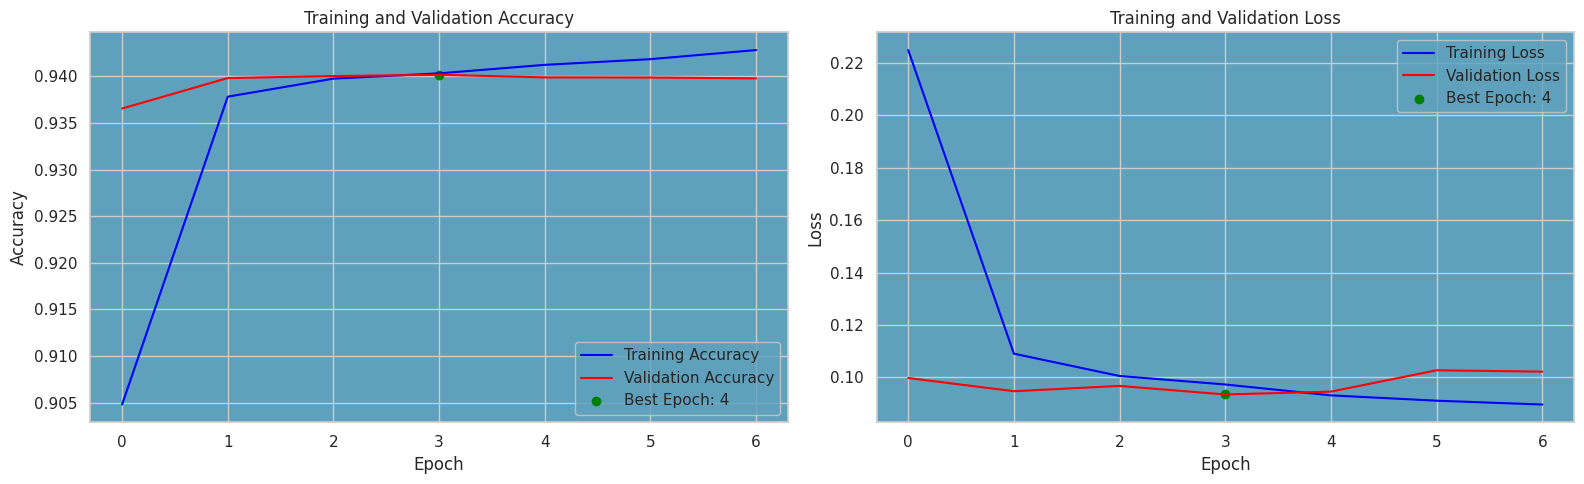

In [51]:
# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [52]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)

2601/2601 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9403 - loss: 0.1027


[0.10222462564706802, 0.9397777318954468]

In [54]:
# Predictions On Test For Confustion Matrix 
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2601/2601 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


<div style="border-radius: 15px 0 15px 0px; border: 1px solid #ffea00; padding: 5px; background-color: #5fa1bc; text-align: center; box-shadow: 0px 1px 2px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #ffff00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 3px; font-size: 18px;">
📊 🎯 Confusion Matrix: True vs. Predicted Labels</h2>
</div>

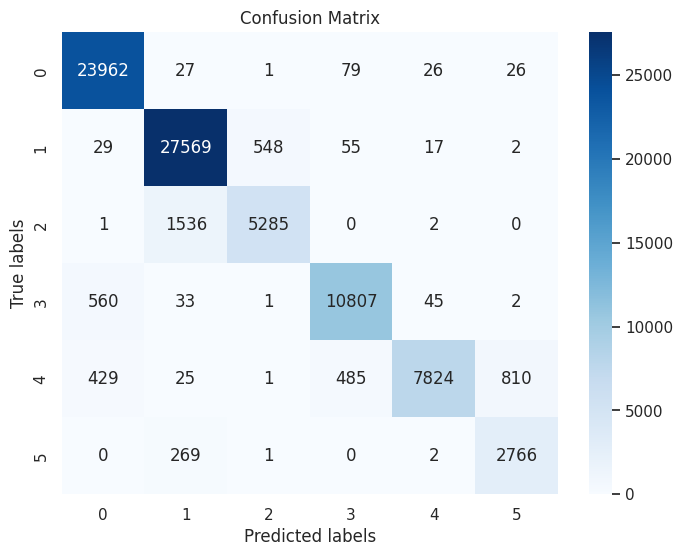

In [55]:
# y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with blue color
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




- Thank you so much for taking the time to explore this notebook with me. Your support means the world to me, and I couldn't have come this far without it. As I continue my journey in data science and machine learning, I humbly ask for your continued support and encouragement. Together, we can make a difference in the world of data science and beyond. 🚀💫

- Please consider leaving an upvote if you found this notebook helpful or insightful. Your support motivates me to keep pushing the boundaries of what's possible in this field. Thank you again, from the bottom of my heart, for being a part of this amazing community. 🙏🌟